## Importação de Bibliotecas

In [1]:
# Para exploração e análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análises estatísticas
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Modelos

## Sobre nossos Dados

"O Ibovespa é o principal indicador de desempenho das ações negociadas na B3 e reúne as empresas mais importantes do mercado de capitais brasileiro. Foi criado em 1968 e, ao longo desses 50 anos, consolidou-se como referência para investidores ao redor do mundo.

Reavaliado a cada quatro meses, o índice é resultado de uma carteira teórica de ativos. É composto pelas ações e units de companhias listadas na B3 que atendem aos critérios descritos na sua metodologia, correspondendo a cerca de 80% do número de negócios e do volume financeiro do nosso mercado de capitais." 

- Fonte: https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm

## Objetivo

## Análise Exploratória de Dados

Começamos a etapa de análise exploratória com a importação da base de dados e seus primeiros tratamentos. Nossa base de dados, contida na pasta **bases** trata-se do histórico de cotação, durante o período de 10 anos (2014 - 2024) da Ibovespa.

In [2]:
historico_ibovespa_df = pd.read_csv("bases/History_Ibovespa_2014-2024.csv",
                                    sep=',',
                                    parse_dates=['Data'],
                                    index_col='Data'
                                    )

/tmp/ipykernel_7312/1782552752.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  historico_ibovespa_df = pd.read_csv("bases/History_Ibovespa_2014-2024.csv",


In [3]:
historico_ibovespa_df.head()

Último  Abertura   Máxima   Mínima   Vol.    Var%
Data                                                          
2024-06-28  123.907   124.308  124.500  123.298  9,07M  -0,32%
2024-06-27  124.308   122.642  124.308  122.642  8,71M   1,36%
2024-06-26  122.641   122.331  122.701  121.402  8,18M   0,25%
2024-06-25  122.331   122.634  122.849  121.997  6,94M  -0,25%
2024-06-24  122.637   121.343  122.840  121.307  7,84M   1,07%

In [4]:
historico_ibovespa_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2600 entries, 2024-06-28 to 2014-01-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    2600 non-null   float64
 1   Abertura  2600 non-null   float64
 2   Máxima    2600 non-null   float64
 3   Mínima    2600 non-null   float64
 4   Vol.      2599 non-null   object 
 5   Var%      2600 non-null   object 
dtypes: float64(4), object(2)
memory usage: 142.2+ KB


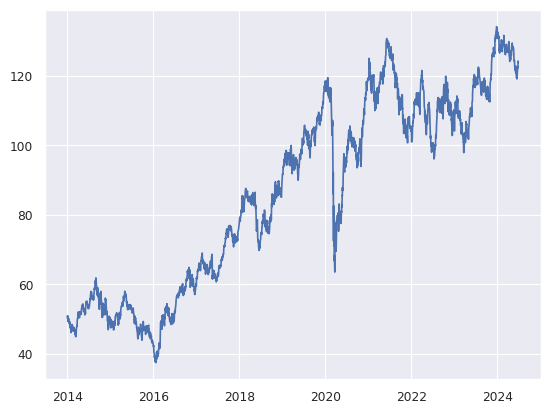

In [5]:
sns.set_theme('paper')
plt.plot(historico_ibovespa_df.index, historico_ibovespa_df.Último)
plt.show()

In [6]:
ibovespa_close = historico_ibovespa_df['Último']
ibovespa_close

Data
2024-06-28    123.907
2024-06-27    124.308
2024-06-26    122.641
2024-06-25    122.331
2024-06-24    122.637
               ...   
2014-01-08     50.577
2014-01-07     50.430
2014-01-06     50.974
2014-01-03     50.981
2014-01-02     50.341
Name: Último, Length: 2600, dtype: float64

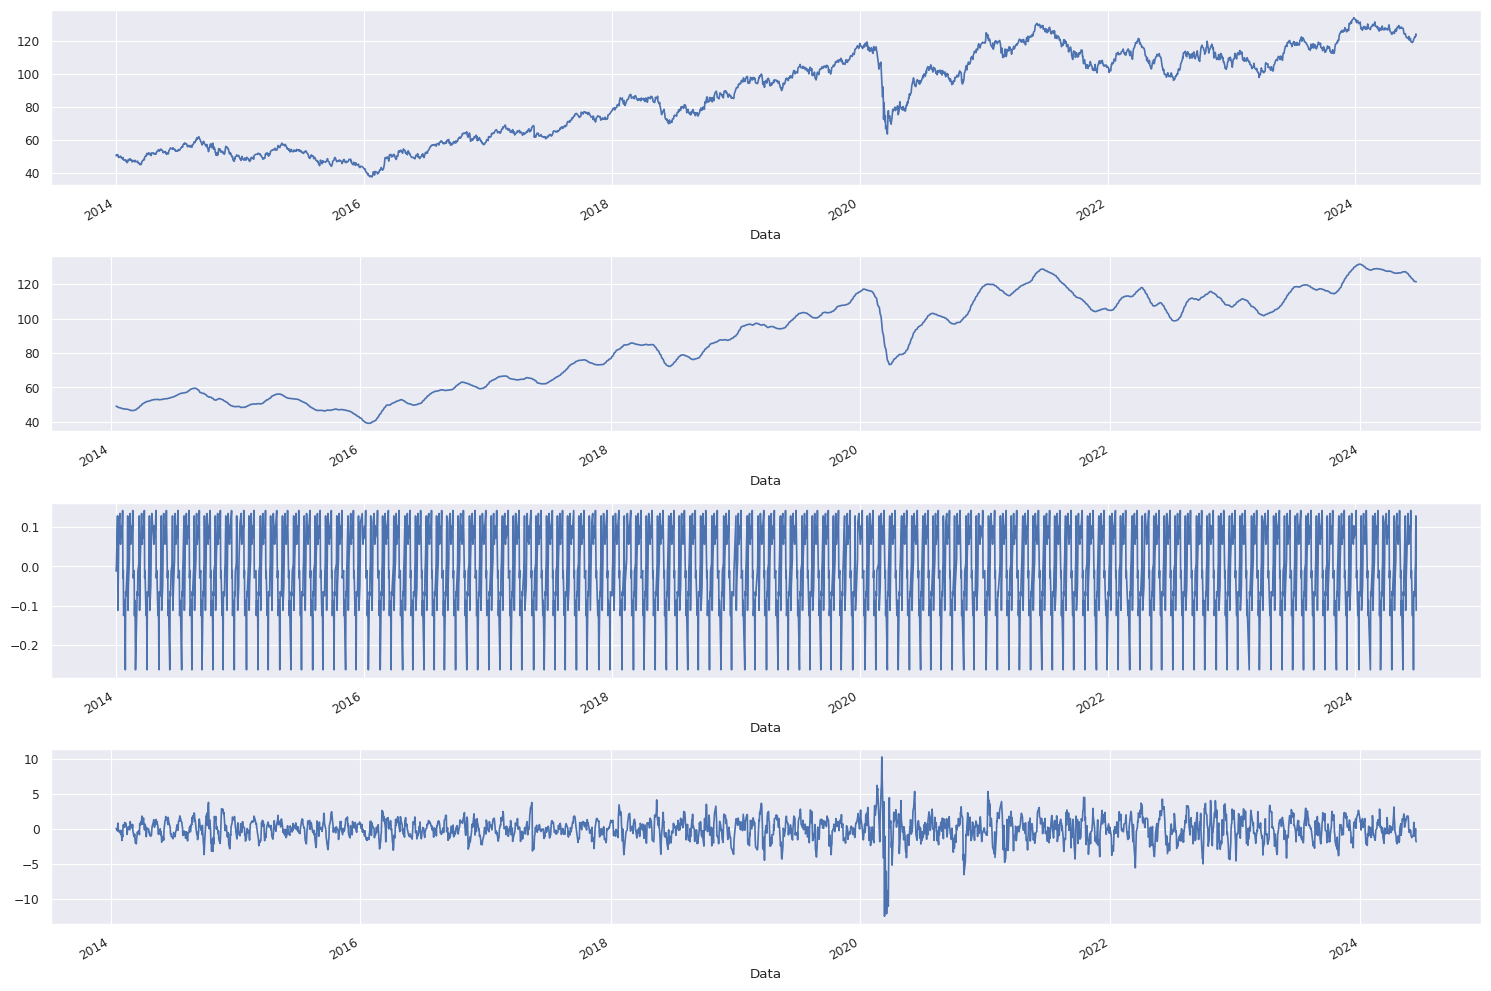

In [7]:
results = seasonal_decompose(ibovespa_close, period=22)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15,10))

results.observed.plot(ax=ax1)
results.trend.plot(ax=ax2)
results.seasonal.plot(ax=ax3)
results.resid.plot(ax=ax4)

plt.tight_layout()

## ADF (Augmented Dickey-Fuller)

In [8]:
def adf_test(timeseries, valor_critico):
    print ('------- Resultados do Teste ADF: -------')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Teste Estatístico','P-Value','#Lags Usados','Número de observações usadas'])
    
    for key,value in dftest[4].items():
        dfoutput['Valor Crítico (%s)'%key] = value
        
    if dftest[1] < valor_critico: # Hipótese Nula
        dfoutput['-> Estacionária'] = True
    else: # Hipótese Alternativa
        dfoutput['-> Estacionária'] = False
        
    print (dfoutput)

In [9]:
adf_test(ibovespa_close, 0.05)

------- Resultados do Teste ADF: -------
Teste Estatístico              -1.176981
P-Value                         0.683419
#Lags Usados                         7.0
Número de observações usadas      2592.0
Valor Crítico (1%)             -3.432875
Valor Crítico (5%)             -2.862656
Valor Crítico (10%)            -2.567364
-> Estacionária                    False
dtype: object


## KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

In [10]:
def kpss_test(timeseries, valor_critico):
    print ('------- Resultados do Teste KPSS: -------')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Teste Estatístico','P-Value','#Lags Usados'])
    
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
        
    if kpsstest[1] > valor_critico: # Hipótese Nula
        kpss_output['-> Estacionária'] = True
    else: # Hipótese Alternativa
        kpss_output['-> Estacionária'] = False
        
    print (kpss_output)

In [11]:
kpss_test(ibovespa_close, 0.05)

------- Resultados do Teste KPSS: -------
Teste Estatístico        7.767073
P-Value                      0.01
#Lags Usados                 30.0
Critical Value (10%)        0.347
Critical Value (5%)         0.463
Critical Value (2.5%)       0.574
Critical Value (1%)         0.739
-> Estacionária             False
dtype: object


/tmp/ipykernel_7312/3263373064.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


## Derivação dos dados

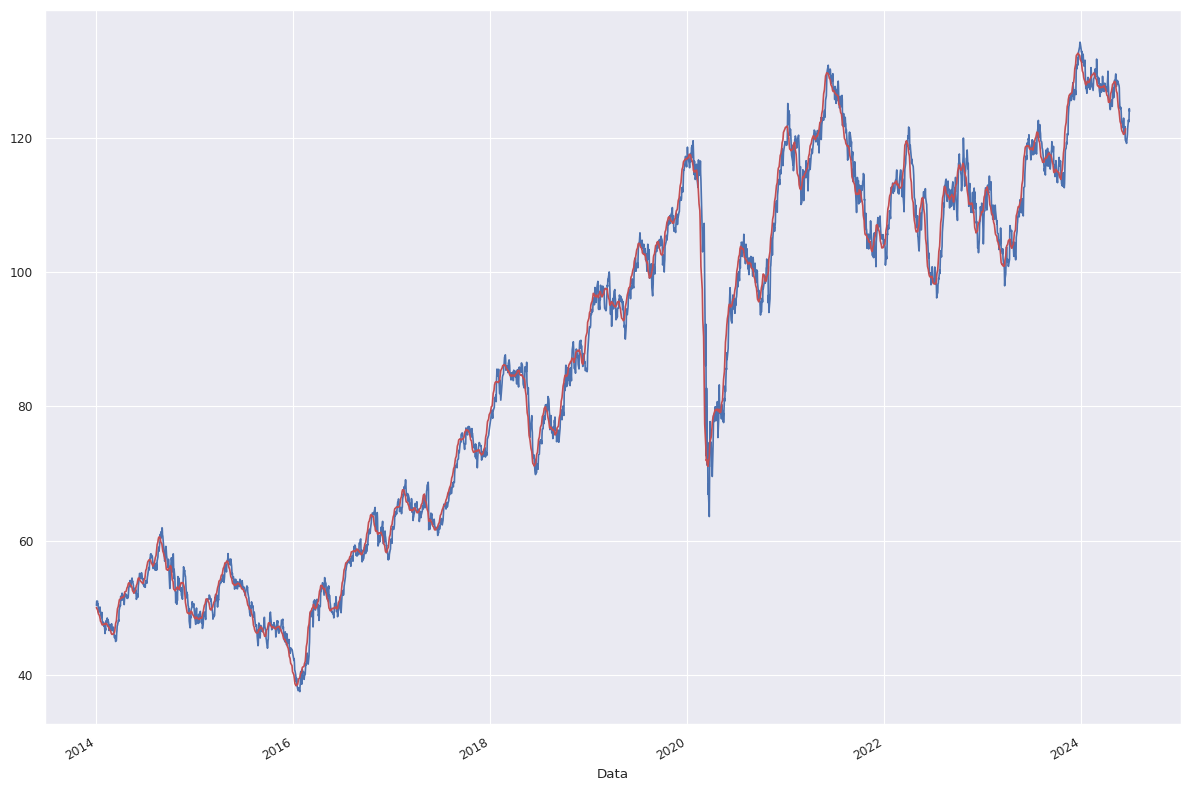

In [12]:
ma = ibovespa_close.rolling(12).mean()

f, ax = plt.subplots(figsize = (12,8))
ibovespa_close.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

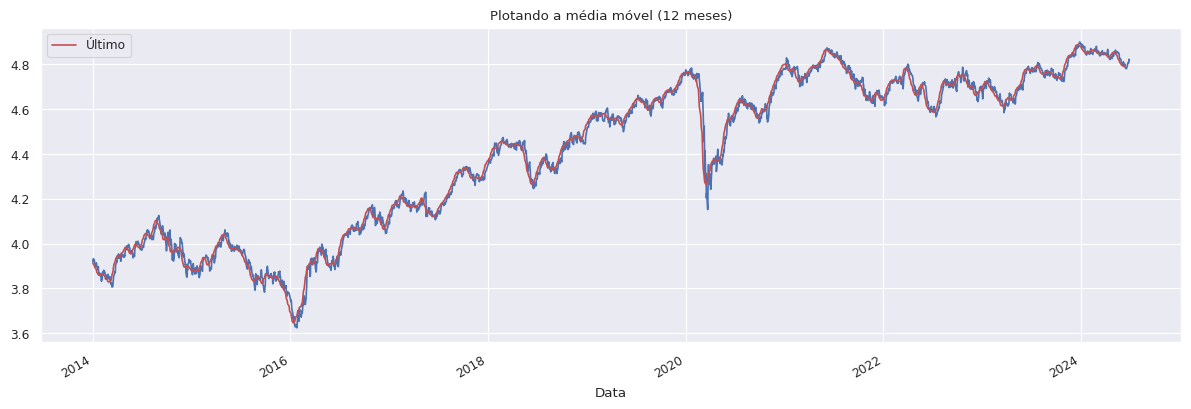

In [13]:
df_log = np.log(ibovespa_close)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots(figsize = (12,4))
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=True, color='r')

plt.tight_layout()
plt.title("Plotando a média móvel (12 meses)")
plt.show()

### Realizando a primeira derivação e aplicando os testes novamente

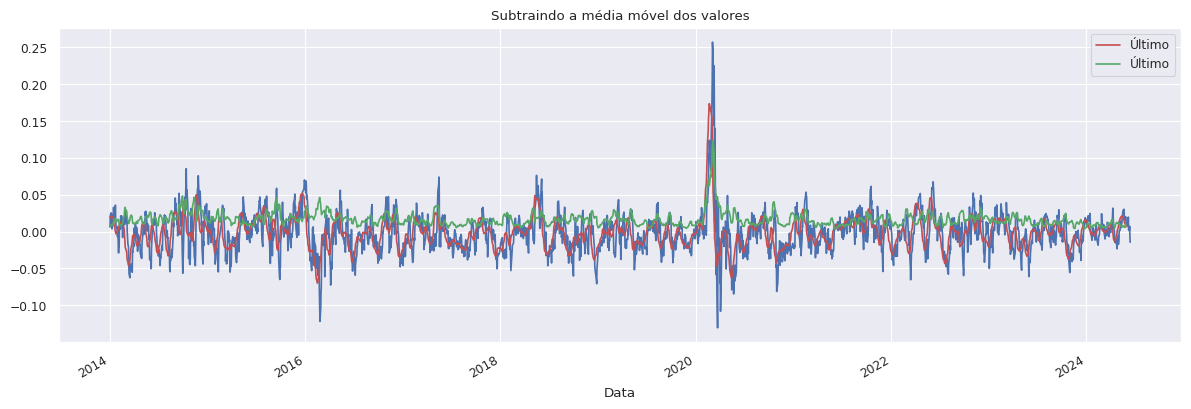

In [14]:
df_sub = (df_log - ma_log).dropna()

ma_sub = df_sub.rolling(12).mean()
std = df_sub.rolling(12).std()

f, ax = plt.subplots(figsize = (12,4))
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, legend=True, color='r')
std.plot(ax=ax, legend=True, color='g')

plt.tight_layout()
plt.title("Subtraindo a média móvel dos valores")
plt.show()

In [15]:
ibovespa_close_1a_derivacao = df_sub.dropna()

In [16]:
ibovespa_close_1a_derivacao

Data
2024-06-13   -0.014467
2024-06-12   -0.008680
2024-06-11    0.007198
2024-06-10    0.001267
2024-06-07    0.002397
                ...   
2014-01-08    0.023998
2014-01-07    0.017527
2014-01-06    0.025474
2014-01-03    0.021526
2014-01-02    0.006145
Name: Último, Length: 2589, dtype: float64

In [17]:
adf_test(ibovespa_close_1a_derivacao, 0.05)
print("\n")
kpss_test(ibovespa_close_1a_derivacao, 0.05)

------- Resultados do Teste ADF: -------
Teste Estatístico              -13.107431
P-Value                               0.0
#Lags Usados                          7.0
Número de observações usadas       2581.0
Valor Crítico (1%)              -3.432886
Valor Crítico (5%)               -2.86266
Valor Crítico (10%)             -2.567366
-> Estacionária                      True
dtype: object


------- Resultados do Teste KPSS: -------
Teste Estatístico        0.041021
P-Value                       0.1
#Lags Usados                 27.0
Critical Value (10%)        0.347
Critical Value (5%)         0.463
Critical Value (2.5%)       0.574
Critical Value (1%)         0.739
-> Estacionária              True
dtype: object


/tmp/ipykernel_7312/3263373064.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


#### Por enquanto faremos apenas uma derivação; dependendo do comportamento dos dados nos modelos, faremos outra.

### Autocorrelação e Autocorrelação Parcial

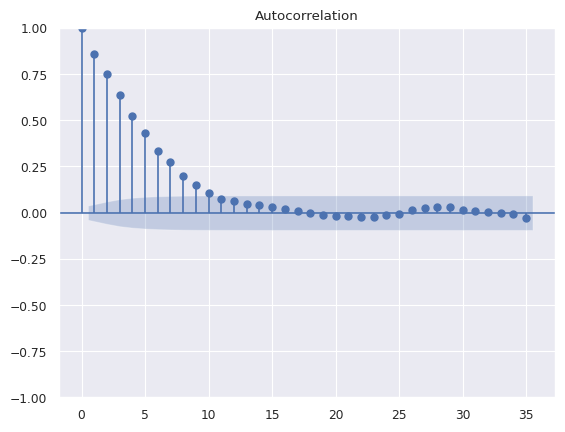

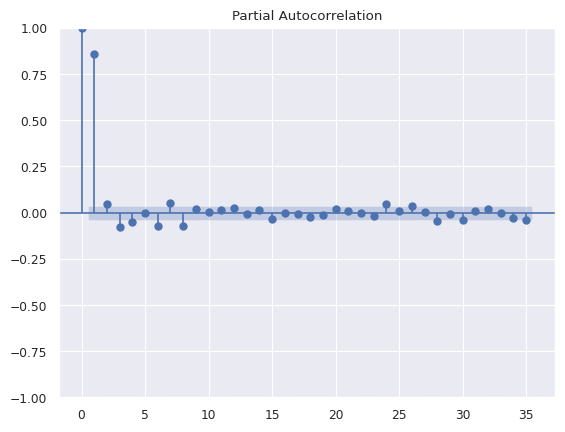

In [18]:
plot_acf(ibovespa_close_1a_derivacao)
plot_pacf(ibovespa_close_1a_derivacao)
plt.show()

In [19]:
df = ibovespa_close_1a_derivacao.reset_index()

In [20]:
df

Data    Último
0    2024-06-13 -0.014467
1    2024-06-12 -0.008680
2    2024-06-11  0.007198
3    2024-06-10  0.001267
4    2024-06-07  0.002397
...         ...       ...
2584 2014-01-08  0.023998
2585 2014-01-07  0.017527
2586 2014-01-06  0.025474
2587 2014-01-03  0.021526
2588 2014-01-02  0.006145

[2589 rows x 2 columns]

In [21]:
df1 = df.rename(columns={'Data':'ds','Último':'y'})

In [22]:
df1['unique_id'] = "close"
df1

ds         y unique_id
0    2024-06-13 -0.014467     close
1    2024-06-12 -0.008680     close
2    2024-06-11  0.007198     close
3    2024-06-10  0.001267     close
4    2024-06-07  0.002397     close
...         ...       ...       ...
2584 2014-01-08  0.023998     close
2585 2014-01-07  0.017527     close
2586 2014-01-06  0.025474     close
2587 2014-01-03  0.021526     close
2588 2014-01-02  0.006145     close

[2589 rows x 3 columns]

In [23]:
df1 = df1.dropna()

In [24]:
df1['y'].isnull().sum()

0

In [25]:
train = df1.loc[df1['ds'] < '2024-03-01']
valid = df1.loc[(df1['ds'] >= '2024-03-01') & (df1['ds'] < '2024-06-01')]
horizon = valid['ds'].nunique()

In [26]:
horizon

63

In [27]:
def wmape(y_true, y_pred):
    return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [28]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA
from statsforecast.utils import ConformalIntervals

/home/jessimoura/.local/lib/python3.8/site-packages/statsforecast/core.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


/home/jessimoura/.local/lib/python3.8/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: nan%


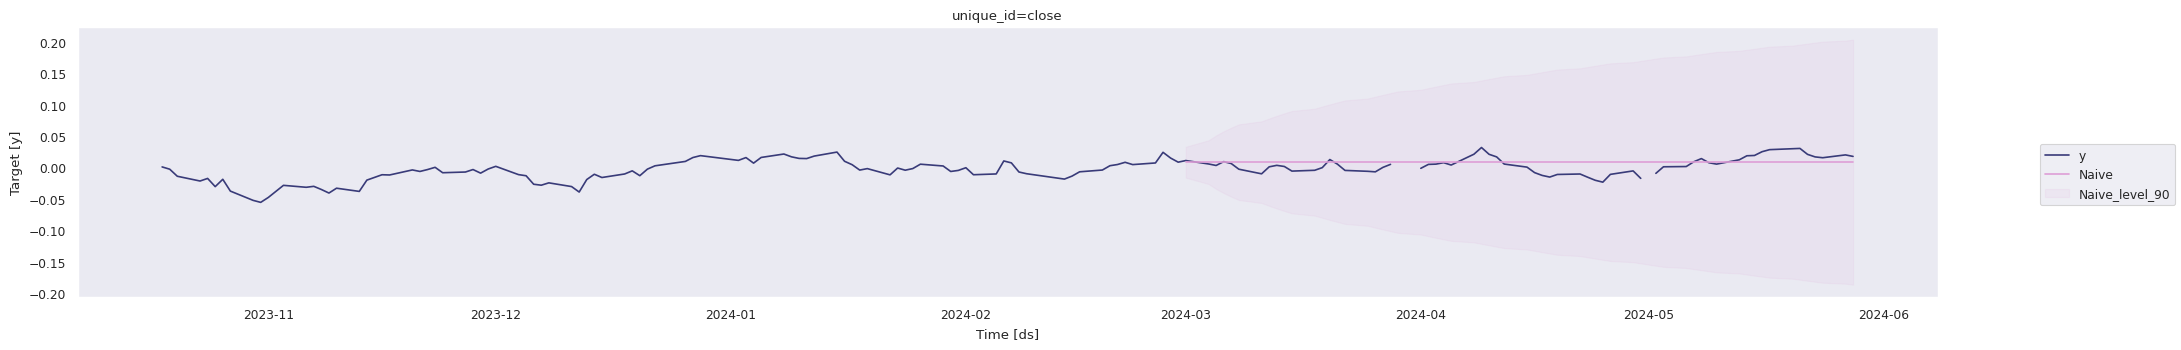

In [29]:
# Principio da Navalha de Ockman
model = StatsForecast(models=[Naive()], freq='B',n_jobs= -1) # n_jobs: qnts nucleos do processador ele vai utilizar, -1 significa todos os disponiveis
model.fit(train)

forecast_df = model.predict(h=horizon, level=[90])
forecast_df = forecast_df.dropna()
forecast_df = forecast_df.reset_index().merge(valid, on=['ds','unique_id'], how='left')

wmape_naive = wmape(forecast_df['y'].values,forecast_df['Naive'].values) # Naive é constante
print(f"WMAPE: {wmape_naive:.2%}")

model.plot(train, forecast_df, level=[90], unique_ids=['close'], engine="matplotlib", max_insample_length=90)
# o modelo baseline ignorou um pouco a sazonalidade dos dados

In [30]:
forecast_df = forecast_df.dropna()

In [31]:
forecast_df['y'].isnull().sum()

0

In [32]:
def wmape(y_true, y_pred):
    return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [33]:
print(wmape(forecast_df['y'].values,forecast_df['Naive'].values))

1.015234671375698


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score

y_true = forecast_df['y'].values
y_pred = forecast_df['Naive'].values

mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE: {:.2f}%".format(mape*100))

MAPE: 295.30%


In [35]:
from sklearn.metrics import mean_absolute_percentage_error

# Dados observados e previstos
y_true = forecast_df['y'].values
y_pred = forecast_df['Naive'].values

# Calcular WMAPE
wmape = mean_absolute_percentage_error(y_true, y_pred, sample_weight=y_true)
print("WMAPE: {:.2f}%".format(wmape*100))

WMAPE: -25.38%


In [36]:
ibovespa_close

Data
2024-06-28    123.907
2024-06-27    124.308
2024-06-26    122.641
2024-06-25    122.331
2024-06-24    122.637
               ...   
2014-01-08     50.577
2014-01-07     50.430
2014-01-06     50.974
2014-01-03     50.981
2014-01-02     50.341
Name: Último, Length: 2600, dtype: float64

In [37]:
df = ibovespa_close.reset_index()
df2 = df.rename(columns={'Data':'ds','Último':'y'})
df2['unique_id'] = "close"

In [38]:
df2

ds        y unique_id
0    2024-06-28  123.907     close
1    2024-06-27  124.308     close
2    2024-06-26  122.641     close
3    2024-06-25  122.331     close
4    2024-06-24  122.637     close
...         ...      ...       ...
2595 2014-01-08   50.577     close
2596 2014-01-07   50.430     close
2597 2014-01-06   50.974     close
2598 2014-01-03   50.981     close
2599 2014-01-02   50.341     close

[2600 rows x 3 columns]

In [39]:
train2 = df2.loc[df2['ds'] < '2024-03-01']
valid2 = df2.loc[(df2['ds'] >= '2024-03-01') & (df2['ds'] < '2024-06-01')]
horizon2 = valid2['ds'].nunique()

In [40]:
horizon2

63

In [41]:
def wmape(y_true, y_pred):
    return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

/home/jessimoura/.local/lib/python3.8/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 1.57%
MAE: 2.001265867139473
sMAPE: 1.5695892414690298
R2: -1.6290569311097811


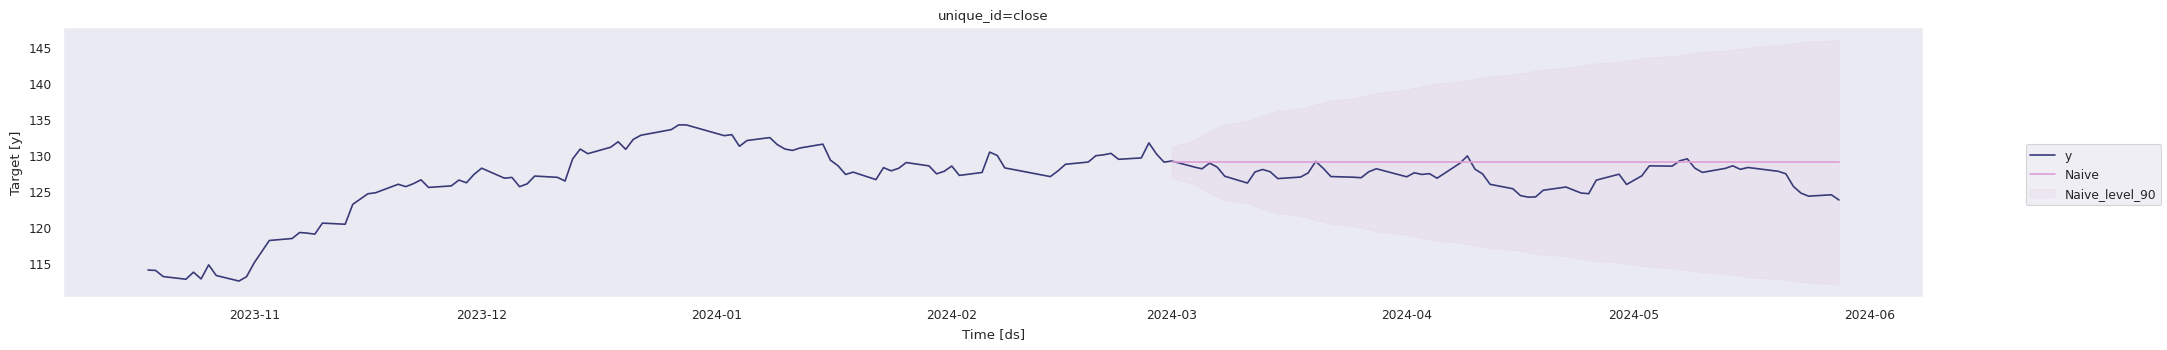

In [42]:
# Principio da Navalha de Ockman
model = StatsForecast(models=[Naive()], freq='B',n_jobs= -1) # n_jobs: qnts nucleos do processador ele vai utilizar, -1 significa todos os disponiveis
model.fit(train2)

forecast_df = model.predict(h=horizon2, level=[90])
forecast_df = forecast_df.reset_index().merge(valid2, on=['ds','unique_id'], how='left')
forecast_df = forecast_df.dropna()

y_true = forecast_df['y'].values
y_pred = forecast_df['Naive'].values

wmape_naive = mean_absolute_percentage_error(y_true, y_pred, sample_weight=y_true) # Naive é constante
mae = mean_absolute_error(y_true, y_pred)
smape = np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100
r2 = r2_score(y_true, y_pred)

print(f"WMAPE: {wmape_naive:.2%}")
print(f"MAE: {mae}")
print(f"sMAPE: {smape}")
print(f"R2: {r2}")

model.plot(train2, forecast_df, level=[90], unique_ids=['close'], engine="matplotlib", max_insample_length=90)

In [43]:
model_season_naive = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='B',n_jobs= -1) # n_jobs: qnts nucleos do processador ele vai utilizar, -1 significa todos os disponiveis
model_season_naive.fit(train2)

forecast_dfs = model_season_naive.predict(h=horizon2, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid2, on=['ds', 'unique_id'], how='left')
forecast_dfs = forecast_dfs.dropna()

y_true = forecast_dfs['y'].values
y_pred = forecast_dfs['SeasonalNaive'].values

wmape_season_naive = mean_absolute_percentage_error(y_true,y_pred,sample_weight=y_true) # Naive é constante
mae = mean_absolute_error(y_true, y_pred)
smape = np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100
r2 = r2_score(y_true, y_pred)

print(f"WMAPE: {wmape_season_naive}")
print(f"MAE: {mae}")
print(f"sMAPE: {smape}")
print(f"R2: {r2}")

model_season_naive.plot(train2, forecast_dfs, level=[90], unique_ids=['close'], engine="plotly", max_insample_length=90)
# o modelo levou um pouco mais em consideração a sazonalidade dos dados

/home/jessimoura/.local/lib/python3.8/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 0.023656818181978526
MAE: 3.006244464811732
sMAPE: 2.3434560691147723
R2: -4.134614442144424


In [44]:
model_arima = StatsForecast(models=[AutoARIMA(season_length=7)], freq='B',n_jobs= -1) # n_jobs: qnts nucleos do processador ele vai utilizar, -1 significa todos os disponiveis
model_arima.fit(train2)

forecast_df_arima = model_arima.predict(h=horizon2, level=[95])
forecast_df_arima = forecast_df_arima.reset_index().merge(valid2, on=['ds', 'unique_id'], how='left')
forecast_df_arima = forecast_df_arima.dropna()

y_true = forecast_df_arima['y'].values
y_pred = forecast_df_arima['AutoARIMA'].values

wmape_arima = mean_absolute_percentage_error(y_true,y_pred,sample_weight=y_true) # Naive é constante
mae = mean_absolute_error(y_true, y_pred)
smape = np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100
r2 = r2_score(y_true, y_pred)

print(f"WMAPE: {wmape_arima:.2%}")
print(f"MAE: {mae}")
print(f"sMAPE: {smape}")
print(f"R2: {r2}")

model_arima.plot(train2, forecast_df_arima, level=[95], unique_ids=['close'], engine="plotly", max_insample_length=90)
# o modelo levou um pouco mais em consideração a sazonalidade dos dados

WMAPE: 1.59%
MAE: 2.0183104348104517
sMAPE: 1.5827937166556714
R2: -1.6543988354551762


/home/jessimoura/.local/lib/python3.8/site-packages/statsforecast/core.py:485: FutureWarning:

In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.



In [45]:
forecast_df_arima

unique_id         ds   AutoARIMA  AutoARIMA-lo-95  AutoARIMA-hi-95        y
0      close 2024-03-01  129.140579       126.613205       131.667938  129.180
1      close 2024-03-04  129.152328       125.732971       132.571686  128.341
2      close 2024-03-05  129.069016       124.935196       133.202835  128.098
3      close 2024-03-06  129.088394       124.347427       133.829361  128.890
4      close 2024-03-07  129.301392       124.022583       134.580185  128.340
..       ...        ...         ...              ...              ...      ...
58     close 2024-05-22  129.029007       109.395569       148.662460  125.650
59     close 2024-05-23  129.029007       109.225960       148.832062  124.729
60     close 2024-05-24  129.029007       109.057800       149.000229  124.306
61     close 2024-05-27  129.029007       108.891037       149.166992  124.496
62     close 2024-05-28  129.029007       108.725647       149.332382  123.780

[61 rows x 6 columns]

In [46]:
ibovespa_close

Data
2024-06-28    123.907
2024-06-27    124.308
2024-06-26    122.641
2024-06-25    122.331
2024-06-24    122.637
               ...   
2014-01-08     50.577
2014-01-07     50.430
2014-01-06     50.974
2014-01-03     50.981
2014-01-02     50.341
Name: Último, Length: 2600, dtype: float64

In [47]:
df_prophet = ibovespa_close.reset_index()
df_prophet = df_prophet.rename(columns={'Data':'ds','Último':'y'})
df_prophet

ds        y
0    2024-06-28  123.907
1    2024-06-27  124.308
2    2024-06-26  122.641
3    2024-06-25  122.331
4    2024-06-24  122.637
...         ...      ...
2595 2014-01-08   50.577
2596 2014-01-07   50.430
2597 2014-01-06   50.974
2598 2014-01-03   50.981
2599 2014-01-02   50.341

[2600 rows x 2 columns]

20:11:10 - cmdstanpy - INFO - Chain [1] start processing
20:11:11 - cmdstanpy - INFO - Chain [1] done processing


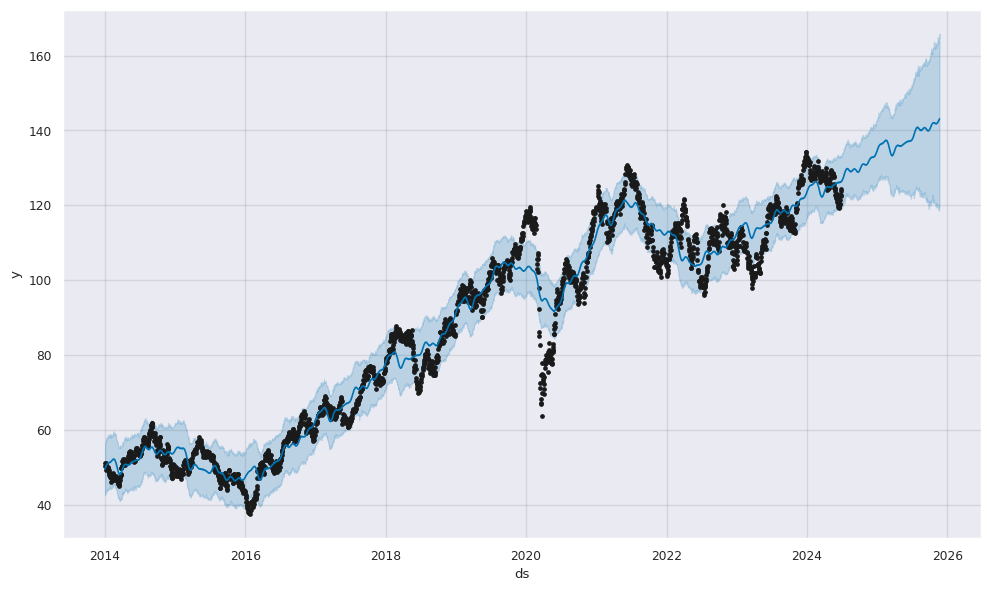

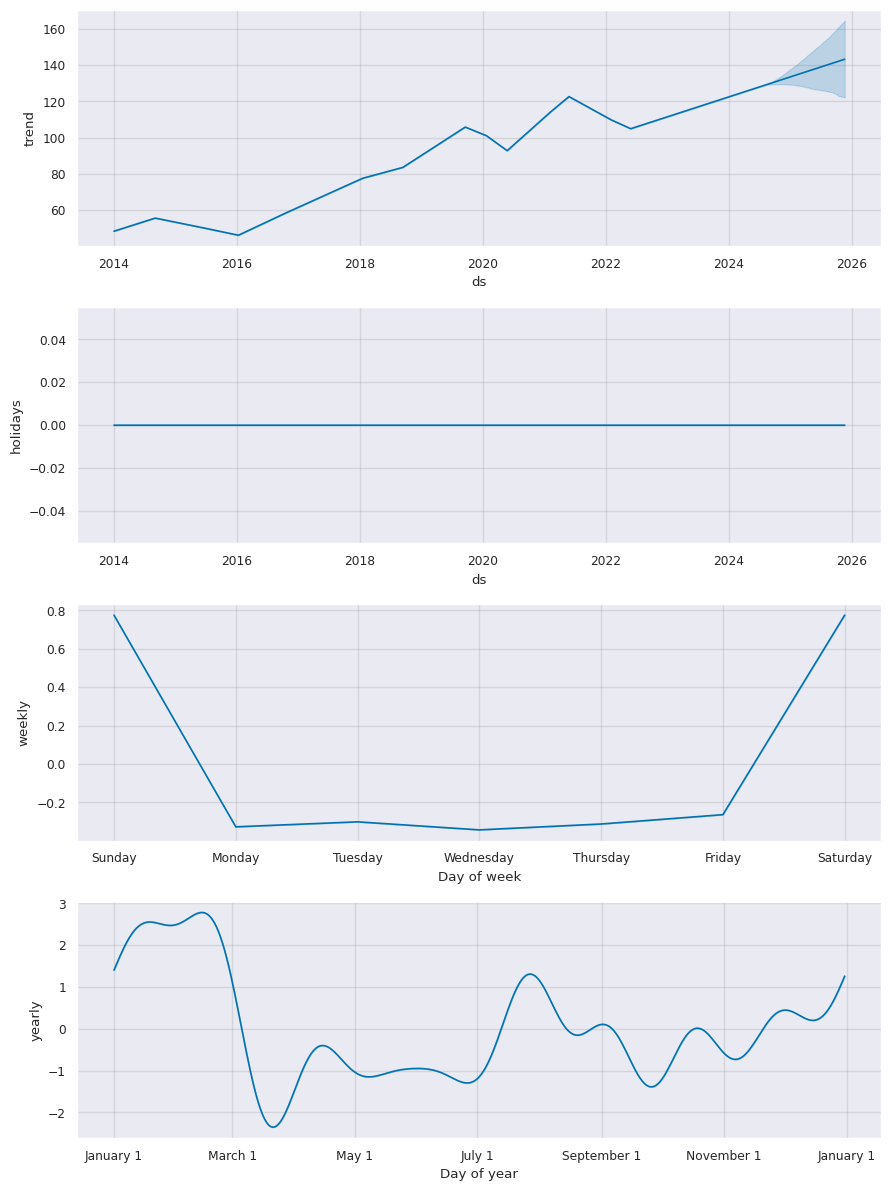

In [48]:
from prophet import Prophet

model = Prophet()
model.add_country_holidays(country_name='BR')
model.fit(df_prophet)

future = model.make_future_dataframe(periods=365, freq='B') 

# Fazer previsões
forecast = model.predict(future)
# Visualizar as previsões
fig = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [49]:
forecast[['ds','yhat']]

ds        yhat
0    2014-01-02   49.531348
1    2014-01-03   49.722896
2    2014-01-06   50.067803
3    2014-01-07   50.219425
4    2014-01-08   50.296578
...         ...         ...
2960 2025-11-17  142.587521
2961 2025-11-18  142.719610
2962 2025-11-19  142.784227
2963 2025-11-20  142.920267
2964 2025-11-21  143.071990

[2965 rows x 2 columns]

In [50]:
df_prophet

ds        y
0    2024-06-28  123.907
1    2024-06-27  124.308
2    2024-06-26  122.641
3    2024-06-25  122.331
4    2024-06-24  122.637
...         ...      ...
2595 2014-01-08   50.577
2596 2014-01-07   50.430
2597 2014-01-06   50.974
2598 2014-01-03   50.981
2599 2014-01-02   50.341

[2600 rows x 2 columns]

In [51]:
forecast_prophet = pd.merge(forecast[['ds','yhat']], df_prophet, on='ds',how='inner')

y_true = forecast_prophet['y'].values
y_pred = forecast_prophet['yhat'].values

wmape = mean_absolute_percentage_error(y_true,y_pred,sample_weight=y_true) # Naive é constante
mape = mean_absolute_percentage_error(y_true,y_pred)
mae = mean_absolute_error(y_true, y_pred)
smape = np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100
r2 = r2_score(y_true, y_pred)

print(f"WMAPE: {wmape:.2%}")
print(f"MAPE: {wmape:.2%}")
print(f"MAE: {mae}")
print(f"sMAPE: {smape}")
print(f"R2: {r2}")

WMAPE: 4.72%
MAPE: 4.72%
MAE: 4.0860688920907675
sMAPE: 4.946356289551316
R2: 0.9602751559360321
